<div class="alert alert-block alert-success">
This jupyter notebook is part of the supplementary material for the book "Materials Data Science" (Stefan Sandfeld, Springer, 2024, DOI 10.1007/978-3-031-46565-9). For further details please refer to the accompanying webpage at <a href="https://mds-book.org">https://mds-book.org</a>.
</div>

In [11]:
import matplotlib.pyplot as plt
import numpy as np

### 12.2 General Concepts and Important Terminology
### 12.2.1 Interpolation

In [12]:
from numpy import linspace
from numpy.polynomial import Polynomial

# support points
x = [1, 3, 4, 7]
y = [2, 5, 4, 8]

# fit a polynomial of degree 3 to the given support points
poly = Polynomial.fit(x, y, deg=3)

# get 20 interpolated y-values in the interval [1, 7]
x_interp = linspace(1, 7, 20)
y_interp = poly(x_interp)
y_interp

array([2.        , 3.25397288, 4.15089663, 4.73538417, 5.0520484 ,
       5.14550226, 5.06035865, 4.8412305 , 4.53273072, 4.17947223,
       3.82606794, 3.51713078, 3.29727366, 3.21110949, 3.3032512 ,
       3.61831171, 4.20090392, 5.09564076, 6.34713515, 8.        ])

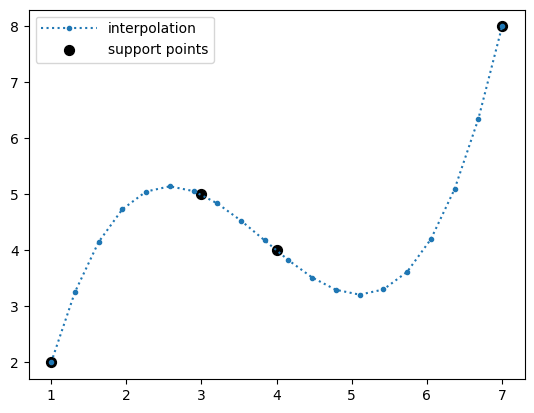

In [13]:
fig, ax = plt.subplots()
ax.plot(x_interp, y_interp, ':', marker='.', label='interpolation')
ax.scatter(x, y, c='k', s=50, label='support points')
ax.legend(handlelength=4)

### 12.2.10: Training and Testing: Data Sets and Errors Types
#### The "Train-Test Split"

Also see the folder `python_listings` which contains all numbered code listings from the MDS book.

In [14]:
def train_test_split(X, Y, fraction, seed=None):
    """
        Returns a training and a testing dataset (Python Listing 12.1)
        X and Y are numpy arrays with as many rows as samples, fraction (=0..1) defines
        the relative amount of training data, and seed is the initialization of the
        random number generator.
    """


    rng = np.random.default_rng(seed)         # initialize random number generator
    n_total_data = X.shape[0]                 # number of data in the full DS
    n_training = int(fraction * n_total_data) # use fraction of data for training

    indices = np.arange(n_total_data)         # range of integers for indexing X and Y
    
    rng.shuffle(indices)                      # shuffle elements of "indices" in place
    X = X[indices]                            # X and y are shuffled such that each X[i]
    Y = Y[indices]                            # ... is still associated with the same Y[i]

    X_training = X[:n_training]               # use the first "n_training" points for the
    Y_training = Y[:n_training]               # training dataset and ...
    X_testing = X[n_training:]                # the rest of the data for testing.
    Y_testing = Y[n_training:]
    
    return X_training, Y_training, X_testing, Y_testing

In [15]:
import numpy as np
fraction = 0.6     # fraction of training data from the whole dataset
n_total_data = 10  # number of data in the full DS

X = np.arange(n_total_data)       # input data
Y = 10 + np.arange(n_total_data)  # output/target data

In [16]:
X_train, Y_train, X_test, Y_test = train_test_split(X, Y, fraction)

In [17]:
print('X =', X, '     Y =', Y)
print('X_train =', X_train, '       Y_train =', Y_train)
print('X_test =', X_test, '            Y_test =', Y_test)

X = [0 1 2 3 4 5 6 7 8 9]      Y = [10 11 12 13 14 15 16 17 18 19]
X_train = [5 7 0 9 3 4]        Y_train = [15 17 10 19 13 14]
X_test = [6 2 1 8]             Y_test = [16 12 11 18]


One can observe that the intersection of the training and the testing dataset is empty; furthermore, the union of these two datasets gives the original dataset.